In [1]:
import numpy as np
from scipy.linalg import null_space
import matplotlib.pyplot as plt

# Ch11 연습문제

**[연습 문제 12-1]**

A⁻¹의 고유벡터는 A의 고유벡터와 같고 고윳값은 λ⁻¹이다.

A와 A⁻¹의 고윳값 분해를 풀어 사실임을 증명하라.

무작위 최대계수 5X5 대칭 행렬을 사용하여 이를 설명하라.

In [2]:
import numpy as np

# 5x5 대칭 행렬 생성
M = np.random.randn(5, 5)
M = M.T @ M  # 대칭 행렬 생성

# M의 역행렬 계산
M_inv = np.linalg.inv(M)

print("행렬 M:\n", M)
print("\n행렬 M⁻¹:\n", M_inv)

행렬 M:
 [[ 3.96815812 -3.55471748  0.59208041 -0.75429458 -0.22852221]
 [-3.55471748  3.80173389 -0.90865117  0.62909362 -1.09261022]
 [ 0.59208041 -0.90865117  2.16887644  0.14459904  0.73691909]
 [-0.75429458  0.62909362  0.14459904  4.02049911 -0.80793097]
 [-0.22852221 -1.09261022  0.73691909 -0.80793097  4.92798765]]

행렬 M⁻¹:
 [[ 3.68764389  3.73669362  0.19156143  0.305427    1.02091507]
 [ 3.73669362  4.09769703  0.31249059  0.26538139  1.07858077]
 [ 0.19156143  0.31249059  0.54503014 -0.03436118 -0.0089688 ]
 [ 0.305427    0.26538139 -0.03436118  0.29102912  0.12585424]
 [ 1.02091507  1.07858077 -0.0089688   0.12585424  0.51137729]]


In [3]:
# 고윳값 계산
vals_M = np.linalg.eigvals(M)  # M의 고윳값
vals_M_inv = np.linalg.eigvals(M_inv)  # M⁻¹의 고윳값

print("행렬 M의 고윳값:", np.sort(vals_M))
print("행렬 M⁻¹의 고윳값:", np.sort(vals_M_inv))
print("M⁻¹의 고윳값의 역수:", np.sort(1 / vals_M_inv))

행렬 M의 고윳값: [0.12544797 1.7361176  3.71918683 5.16351931 8.14298351]
행렬 M⁻¹의 고윳값: [0.12280511 0.19366636 0.26887598 0.57599785 7.97143217]
M⁻¹의 고윳값의 역수: [0.12544797 1.7361176  3.71918683 5.16351931 8.14298351]


In [4]:
# 고윳값 관계 확인
relation = np.allclose(np.sort(vals_M), np.sort(1 / vals_M_inv))
print("M⁻¹의 고윳값이 M의 고윳값의 역수인가?:", relation)

M⁻¹의 고윳값이 M의 고윳값의 역수인가?: True


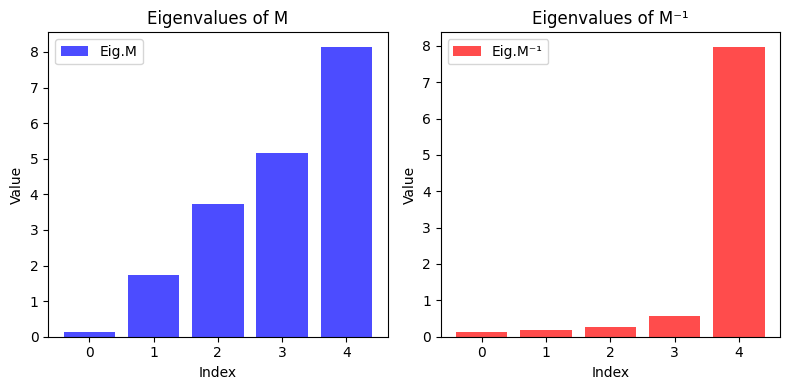

In [5]:
import matplotlib.pyplot as plt

# 시각화: M과 M⁻¹의 고윳값 비교
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.bar(range(len(vals_M)), np.sort(vals_M), color='b', alpha=0.7, label='Eig.M')
plt.title("Eigenvalues of M")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(range(len(vals_M_inv)), np.sort(vals_M_inv), color='r', alpha=0.7, label='Eig.M⁻¹')
plt.title("Eigenvalues of M⁻¹")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()

plt.tight_layout()
plt.show()

[연습 문제 12-2]

[그림 12-1]의 왼쪽 그림을 다시 생성하되 V의 열 대신 행을 사용하여라.

코딩오류가 생길 것임

(행렬에 고유벡터를 곱하면 늘어나기만 한다는 기하학적 테스트에서 실패함.

In [6]:
# 행렬 M과 고유벡터
print("행렬 M:\n", M)

# 행렬 M의 고유벡터와 고윳값 계산
vals_M, vecs = np.linalg.eig(M)

# 고유벡터를 행 단위로 활용
V_row = vecs.T

# 고유벡터와 임의 벡터 정의
rand_vecs = np.random.randn(5, 5)

# M과 고유벡터의 곱
Mv_row = M @ V_row

# 임의 벡터에 M 곱하기
Mw = M @ rand_vecs

# 고유벡터와 변환된 고유벡터 비교
print("\nM에 고유벡터(행 단위)를 곱한 결과:\n", Mv_row)

행렬 M:
 [[ 3.96815812 -3.55471748  0.59208041 -0.75429458 -0.22852221]
 [-3.55471748  3.80173389 -0.90865117  0.62909362 -1.09261022]
 [ 0.59208041 -0.90865117  2.16887644  0.14459904  0.73691909]
 [-0.75429458  0.62909362  0.14459904  4.02049911 -0.80793097]
 [-0.22852221 -1.09261022  0.73691909 -0.80793097  4.92798765]]

M에 고유벡터(행 단위)를 곱한 결과:
 [[ 4.97636676 -0.0233701   1.50523273 -1.06465594  1.09089278]
 [-5.01851812 -0.15130218 -1.69782898 -0.35731632 -1.13388057]
 [ 1.83415299 -0.19342252  0.07212543  1.1647558  -1.29645755]
 [-0.32492416 -0.39951406 -4.16490439  0.36093394  0.24678822]
 [ 0.7510108   0.15146459  2.19603245  4.56936609  0.66201231]]


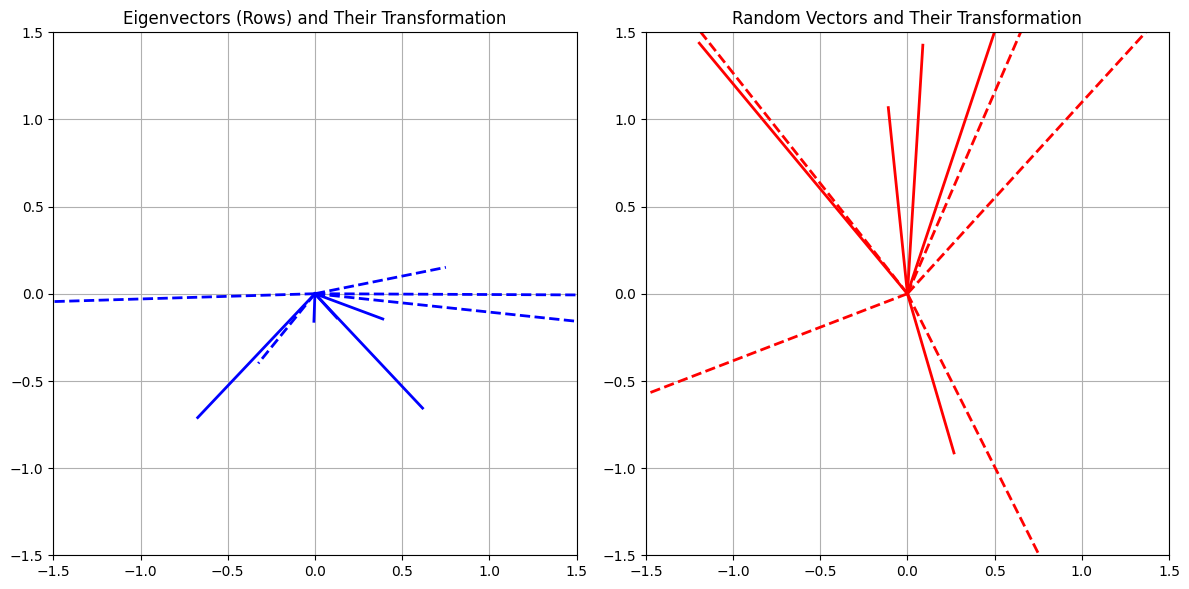

In [7]:
# 플롯 생성
plt.figure(figsize=(12, 6))

# 고유벡터(행)와 변환된 고유벡터
plt.subplot(1, 2, 1)
for i in range(V_row.shape[0]):
    plt.plot([0, V_row[i, 0]], [0, V_row[i, 1]], 'b', linewidth=2, label=f'Row {i + 1}')
    plt.plot([0, Mv_row[i, 0]], [0, Mv_row[i, 1]], 'b--', linewidth=2, label=f'Transformed Row {i + 1}')
plt.title("Eigenvectors (Rows) and Their Transformation")
plt.axis('square')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid()

# 임의 벡터와 변환된 임의 벡터
plt.subplot(1, 2, 2)
for i in range(rand_vecs.shape[0]):
    plt.plot([0, rand_vecs[i, 0]], [0, rand_vecs[i, 1]], 'r', linewidth=2, label=f'Random Vec {i + 1}')
    plt.plot([0, Mw[i, 0]], [0, Mw[i, 1]], 'r--', linewidth=2, label=f'Transformed Vec {i + 1}')
plt.title("Random Vectors and Their Transformation")
plt.axis('square')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid()

plt.tight_layout()
plt.show()


[연습 문제 12-10]

일반화된 고윳값 분해에서는 두 행렬이 대칭인 경우에도 고유벡터는 직교하지 않는다.

python에서 V⁻¹≠V^T를 확인하여라.

A와 B가 모두 대칭이지만 C=AB가 대칭이 아니기 때문, 고유벡터는 B에 대해 직교하므로 V^TBV=I임.

두 대칭 행렬에 대해 일반화된 고윳값 분해를 수행.

In [8]:
n = 5
A = np.random.randn(n, n)
A = A.T @ A  # 대칭 행렬 A
B = np.random.randn(n, n)
B = B.T @ B  # 대칭 행렬 B

print("행렬 A:\n", A)
print("\n행렬 B:\n", B)

행렬 A:
 [[ 7.22983976 -3.24710614  1.49757786 -2.61058921  1.6041739 ]
 [-3.24710614  3.06193165 -2.93565808  2.03038577  0.64596535]
 [ 1.49757786 -2.93565808  3.8479641  -2.28420948 -1.52525753]
 [-2.61058921  2.03038577 -2.28420948  5.01756825  0.5820126 ]
 [ 1.6041739   0.64596535 -1.52525753  0.5820126   1.64327401]]

행렬 B:
 [[ 1.73373591  0.56207654  0.14602333 -0.29809269  0.37585082]
 [ 0.56207654  3.63841879 -1.00901034  0.23911125 -3.69546506]
 [ 0.14602333 -1.00901034 16.05321634  1.64086887 -0.75218065]
 [-0.29809269  0.23911125  1.64086887  1.86444341 -1.1338713 ]
 [ 0.37585082 -3.69546506 -0.75218065 -1.1338713   5.04919234]]


In [9]:
from scipy.linalg import eigh

# 일반화된 고윳값 분해 수행
evals, evecs = eigh(A, B)

print("A와 B의 일반화된 고윳값:\n", evals)
print("\nA와 B의 일반화된 고유벡터:\n", evecs)

A와 B의 일반화된 고윳값:
 [1.29149927e-04 3.88962891e-02 1.29921288e+00 3.10158304e+00
 3.95205147e+01]

A와 B의 일반화된 고유벡터:
 [[-0.15382271 -0.05848074 -0.10501173  0.5933627  -1.01041531]
 [-0.2676653   0.10027589 -0.53185627  0.0321038   1.81005119]
 [-0.09351627  0.24642714 -0.0667219  -0.07346022  0.1205946 ]
 [-0.03532789  0.01250998  0.47222254  0.56533877  0.58300408]
 [ 0.18124701  0.25889678 -0.40824757  0.20736942  1.56022673]]


In [10]:
# 고유벡터 행렬 V와 V^T를 곱한 결과
VV = evecs.T @ evecs

# 고유벡터와 B를 곱한 결과
VBV = evecs.T @ B @ evecs

print("\nV^T * V:\n", VV)
print("\nV^T * B * V:\n", VBV)


V^T * V:
 [[ 1.38149974e-01  5.59266013e-03  7.40759648e-02 -7.53831461e-02
  -7.81505089e-02]
 [ 5.59266013e-03  1.41385629e-01 -1.63419769e-01  1.11760108e-02
   6.81543154e-01]
 [ 7.40759648e-02 -1.63419769e-01  6.88010568e-01  1.07824403e-01
  -1.22627901e+00]
 [-7.53831461e-02  1.11760108e-02  1.07824403e-01  7.21116364e-01
   1.02845977e-01]
 [-7.81505089e-02  6.81543154e-01 -1.22627901e+00  1.02845977e-01
   7.08596867e+00]]

V^T * B * V:
 [[ 1.00000000e+00 -2.24533937e-16  4.26903466e-16 -2.71083053e-18
   1.42972102e-15]
 [-2.47008196e-16  1.00000000e+00 -1.89272999e-16 -1.21884714e-16
   4.25705702e-16]
 [ 5.13213632e-16 -2.17012529e-16  1.00000000e+00 -5.61799771e-18
   4.55713853e-16]
 [-5.46435518e-18 -1.36924794e-16  1.68650946e-17  1.00000000e+00
   3.21150753e-16]
 [ 7.60610298e-16  4.73214428e-16  5.85926133e-17  2.39349636e-16
   1.00000000e+00]]


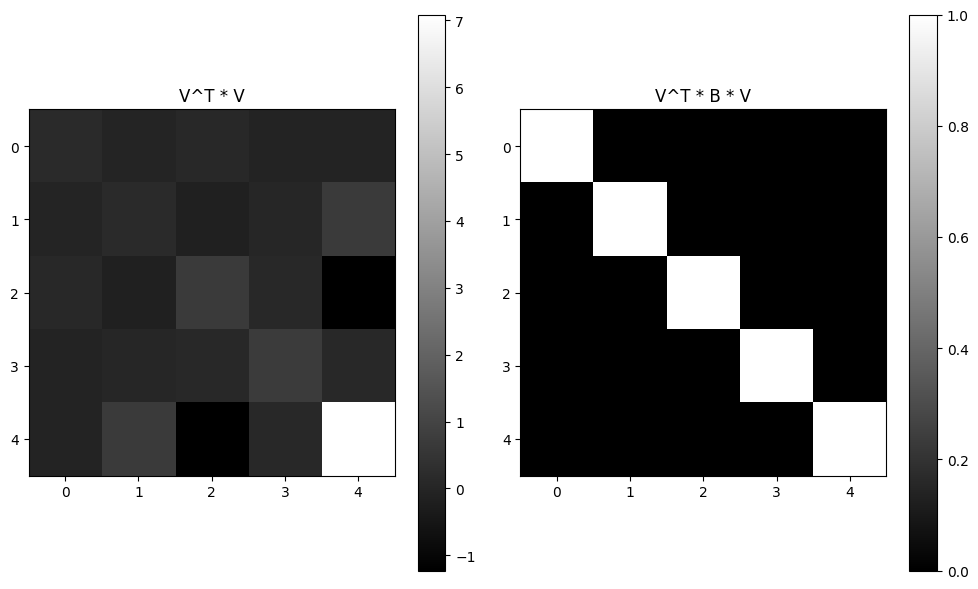

In [11]:
plt.figure(figsize=(10, 6))

# VV 행렬
plt.subplot(1, 2, 1)
plt.imshow(VV, cmap='gray')
plt.title("V^T * V")
plt.colorbar()

# VBV 행렬
plt.subplot(1, 2, 2)
plt.imshow(VBV, cmap='gray')
plt.title("V^T * B * V")
plt.colorbar()

plt.tight_layout()
plt.show()